# Risk Management: Calculate The Four Moments

### import stock data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

StockPrices = pd.read_csv("StockPrices.csv", parse_dates=["Date"])
StockPrices = StockPrices.sort_values(by="Date")
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


### calculate daily returns of adjusted close
### plot the return & the distribution

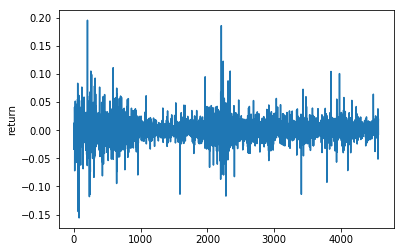

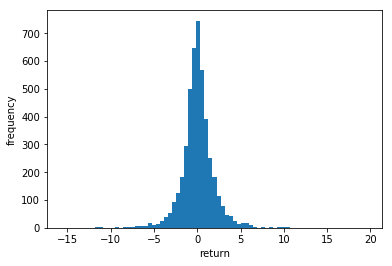

In [16]:
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
stk = StockPrices['Returns'].plot()
stk.set_ylabel("return")
plt.show()
percent_return = StockPrices['Returns']*100
returns_plot = percent_return.dropna()
plt.hist(returns_plot, bins = 75, density = False)
plt.xlabel('return')
plt.ylabel('frequency')
plt.show()

### average annualized return

In [9]:
((1 + np.mean(StockPrices["Returns"]))**252)-1

0.09985839482858783

### calculate Annualized standard deviation & variance

In [11]:
sigma_daily = np.std(StockPrices['Returns'])
sigma_annualized = sigma_daily*np.sqrt(252)
variance_annualized = sigma_annualized**2

### calculate skewness

In [10]:
from scipy.stats import skew
skew(returns_plot)

0.21935459193067844

### calculate excess kurtosis ie kurtosis - 3

In [12]:
from scipy.stats import kurtosis
kurtosis(returns_plot)

10.314572618025524

### test normality with Shapiro-Wilk test

In [13]:
from scipy.stats import shapiro
p_value = shapiro(returns_plot)[1]  # second value is the p-value so called [1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected")
else:
    print("Null hypothesis of normality is accepted")

Null hypothesis of normality is rejected
